### Laboratorio 2 - Series de Tiempo
- - -
- Diego Alberto Leiva 21750
- José Pablo Orellana 21970
- - -

#### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Cargar la data

In [46]:
num_rows_to_read = 279
data = pd.read_csv('importacion.csv', skiprows=6, nrows=num_rows_to_read, usecols=range(25))
data1 = pd.read_csv('precios.csv')

#### Visualizar estructura e información general del dataset

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     279 non-null    object 
 1   Aceites lubricantes       279 non-null    object 
 2   Asfalto                   279 non-null    object 
 3   Bunker                    279 non-null    object 
 4   Ceras                     278 non-null    float64
 5   Combustible turbo jet     279 non-null    object 
 6   Diesel bajo azufre        279 non-null    object 
 7   Diesel ultra bajo azufre  279 non-null    object 
 8   Gas licuado de petróleo   279 non-null    object 
 9   Gasolina de aviación      279 non-null    object 
 10  Gasolina regular          279 non-null    object 
 11  Gasolina superior         279 non-null    object 
 12  Grasas lubricantes        279 non-null    object 
 13  Kerosina                  279 non-null    object 
 14  Mezclas ol

In [48]:
print(f"El dataset de importación contiente: {data.shape[0]} observaciones y {data.shape[1]} variables")

El dataset de importación contiente: 279 observaciones y 25 variables


In [49]:
data.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,Jan/2001,0.00,"27,748.99","214,581.84",0.0,0.00,0.00,0.00,"194,065.74",820.00,...,0.0,0.00,0.00,0.00,0.0,"566,101.99","8,402.00",0.00,"715,344.00","2,312,639.05"
1,Feb/2001,0.00,"7,503.57","294,609.00",0.0,0.00,0.00,0.00,"170,703.38","3,054.00",...,0.0,0.00,0.00,0.00,0.0,"489,525.80",0.00,0.00,"370,166.00","1,769,208.76"
2,Mar/2001,0.00,"26,304.32","315,263.80",0.0,0.00,0.00,0.00,"161,837.37",677.00,...,0.0,0.00,0.00,0.00,0.0,"575,559.68",0.00,0.00,"360,530.00","1,945,770.26"
3,Apr/2001,0.00,"7,885.89","205,653.00",0.0,0.00,0.00,0.00,"163,048.64","3,399.00",...,0.0,0.00,0.00,0.00,0.0,"437,745.42","8,184.00",0.00,"359,527.00","1,623,637.76"
4,May/2001,0.00,"8,443.16","278,371.30",0.0,0.00,0.00,0.00,"171,518.86",585.00,...,0.0,0.00,0.00,0.00,0.0,"552,609.13","12,680.00",0.00,"723,346.00","2,262,726.64"


**Variables identificadas**
- Fecha: Fecha de Importación

**Precios**
- Aceites Lubricantes
- Asfalto
- Bunker
- Ceras
- Combustible turbo jet
- Diesel bajo azufre
- Diesel ultra bajo azufre
- Gas licuado de petróleo
- Gasolina de aviación
- Gasolina regular
- Gasolina superior
- Grasas lubricantes
- Kerosina
- Mezclas oleosas
- Naftas
- Petcoke
- Petróleo crudo	
- Solventes
- Butano
- Diesel alto azufre	
- MTBE
- Orimulsión
- Petróleo reconstituido	
- Total importación: Suma total de precios

----
### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

##### Visualizar la data faltante

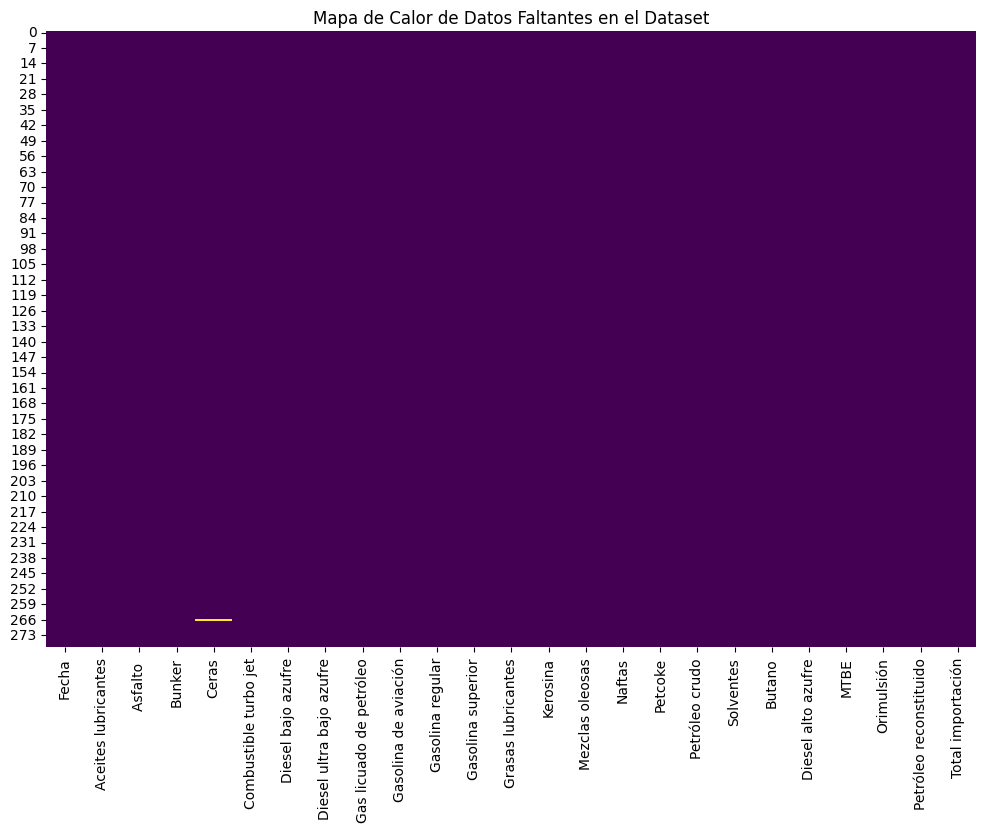

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

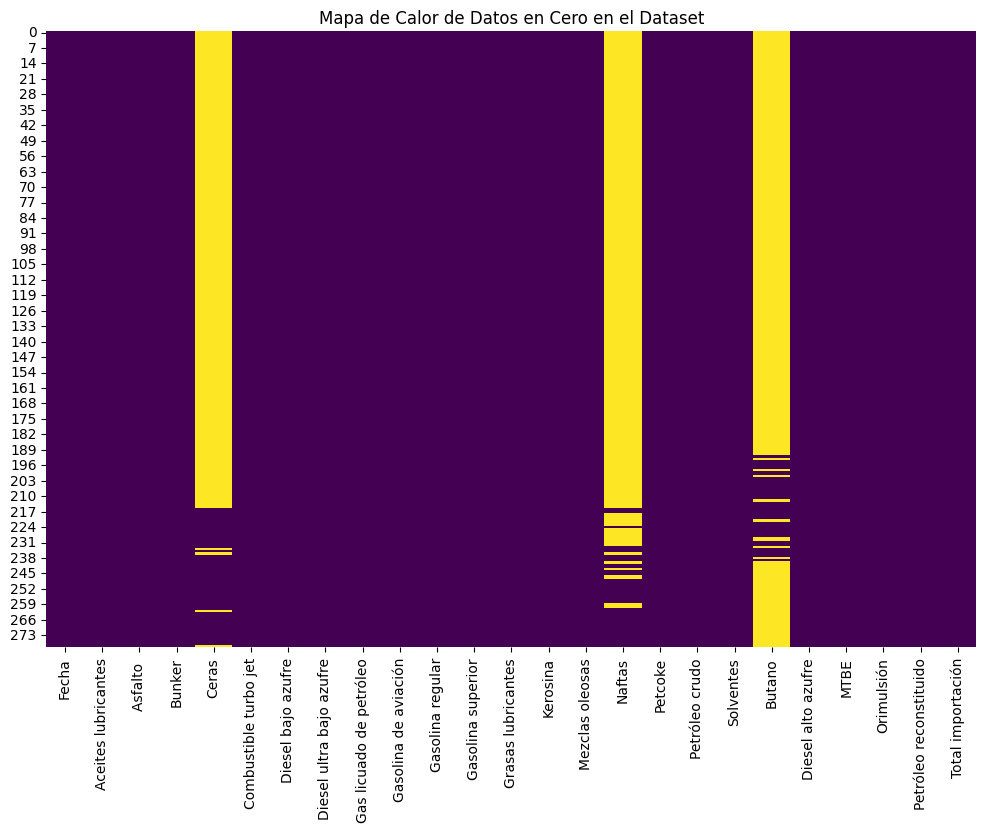

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(data == 0, cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos en Cero en el Dataset')
plt.show()

#### Porcentaje de valores nulos ceros

In [54]:
print("Porcentaje de valores nulos en cada columna:")
null_percentage_numeric = data.isnull().mean() * 100
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))

Porcentaje de valores nulos en cada columna:
Porcentaje de data faltante en variables numericas:
Ceras                       0.358423
Fecha                       0.000000
Kerosina                    0.000000
Petróleo reconstituido      0.000000
Orimulsión                  0.000000
MTBE                        0.000000
Diesel alto azufre          0.000000
Butano                      0.000000
Solventes                   0.000000
Petróleo crudo              0.000000
Petcoke                     0.000000
Naftas                      0.000000
Mezclas oleosas             0.000000
Grasas lubricantes          0.000000
Aceites lubricantes         0.000000
Gasolina superior           0.000000
Gasolina regular            0.000000
Gasolina de aviación        0.000000
Gas licuado de petróleo     0.000000
Diesel ultra bajo azufre    0.000000
Diesel bajo azufre          0.000000
Combustible turbo jet       0.000000
Bunker                      0.000000
Asfalto                     0.000000
Total importaci

In [55]:
print("Porcentaje de valores cero en cada columna:")
zero_percentage = (data == 0).mean() * 100
print(zero_percentage.sort_values(ascending=False))

Porcentaje de valores cero en cada columna:
Butano                      86.021505
Naftas                      84.946237
Ceras                       78.853047
Fecha                        0.000000
Kerosina                     0.000000
Petróleo reconstituido       0.000000
Orimulsión                   0.000000
MTBE                         0.000000
Diesel alto azufre           0.000000
Solventes                    0.000000
Petróleo crudo               0.000000
Petcoke                      0.000000
Mezclas oleosas              0.000000
Grasas lubricantes           0.000000
Aceites lubricantes          0.000000
Gasolina superior            0.000000
Gasolina regular             0.000000
Gasolina de aviación         0.000000
Gas licuado de petróleo      0.000000
Diesel ultra bajo azufre     0.000000
Diesel bajo azufre           0.000000
Combustible turbo jet        0.000000
Bunker                       0.000000
Asfalto                      0.000000
Total importación            0.000000
dtype:

In [32]:
data_copy = data.copy()

# Eliminar filas con cualquier valor nulo
data_raw_clean = data_copy.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_raw_clean.shape[0]
remaining_records_percentage = (remaining_records / data.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original")

Si se eliminacen todas las observaciones con valores nulos,       
quedarian 280 registros,       
98.59% de la data original


In [33]:
data_clean = data.copy()

# Convert columns to numeric where appropriate
for column in data_clean.columns:
    data_clean[column] = pd.to_numeric(data_clean[column], errors='coerce')

# Eliminar las variables con más del 50% de valores faltantes
threshold = 0.5
data_clean = data_clean[data_clean.columns[data_clean.isnull().mean() < threshold]]

# Imputar los valores faltantes con la media para variables continuas
# con menos de 10% de valores faltantes
mean_threshold = 10
for column in data_clean.columns:
    null_percentage = data_clean[column].isnull().mean() * 100
    if null_percentage < mean_threshold:
        median = data_clean[column].median()
        data_clean.fillna({column: median}, inplace=True)
    
# Eliminar las observaciones con valores faltantes para variables continuas
# con más de 10% de valores faltantes
data_clean = data_clean.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_clean.shape[0]
remaining_records_percentage = (remaining_records / data.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original")


Si se eliminacen todas las observaciones con valores nulos,       
quedarian 108 registros,       
38.03% de la data original


In [34]:
data_clean.isnull().sum()

Aceites lubricantes         0
Ceras                       0
Combustible turbo jet       0
Diesel bajo azufre          0
Diesel ultra bajo azufre    0
Gasolina de aviación        0
Grasas lubricantes          0
Mezclas oleosas             0
Naftas                      0
Petróleo crudo              0
Solventes                   0
Butano                      0
MTBE                        0
Orimulsión                  0
Petróleo reconstituido      0
dtype: int64

#### Identificación de Variables

In [35]:
# Se convierten las variables a un tipo mas adecaudo
# por medio de inferencia
data_clean = data_clean.infer_objects()

# Si existen nulos la inferencia no se realizara
# por lo tanto se trata de convertir las variables    
for col in data_clean.columns:
    # convertir a integer
    try:
        data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce', downcast='integer')
    except ValueError:
        # convertir a float
        try:
            data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce', downcast='float')
        except ValueError:
            try:
                # convertir a fecha
                data_clean[col] = pd.to_datetime(data_clean[col], errors='coerce')
            except ValueError:
                # si no se puede convertir se deja como esta
                pass

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Aceites lubricantes       108 non-null    int8   
 1   Ceras                     108 non-null    int8   
 2   Combustible turbo jet     108 non-null    int8   
 3   Diesel bajo azufre        108 non-null    int8   
 4   Diesel ultra bajo azufre  108 non-null    int8   
 5   Gasolina de aviación      108 non-null    float64
 6   Grasas lubricantes        108 non-null    int8   
 7   Mezclas oleosas           108 non-null    int8   
 8   Naftas                    108 non-null    int8   
 9   Petróleo crudo            108 non-null    int8   
 10  Solventes                 108 non-null    int8   
 11  Butano                    108 non-null    int8   
 12  MTBE                      108 non-null    int8   
 13  Orimulsión                108 non-null    int8   
 14  Petróleo recons

**Variables categóricas**

In [36]:
# Encontrar variables categoricas en el dataset
categorical = data_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables categoricas en el dataset:")
for column in categorical:
    print(f"- {column}")


# Contar las variables categoricas binarias en el dataset
binary_categorical = [col for col in categorical if data_clean[col].nunique() == 2]

print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset de :")
for column in binary_categorical:
    print(f"- {column}")

Hay 0 variables categoricas en el dataset:

Hay 0 variables categoricas binarias en el dataset de :


**Variables numéricas**

In [37]:
# Encontrar variables numericas en el dataset de entreno
numerical = data_clean.select_dtypes(exclude=['object']).columns.tolist()

# Contar las variables cuantitativas binarias en el dataset de entreno
binary = [col for col in numerical if data_clean[col].nunique() == 2]

# Contar las variables cuantitativas continuas en el dataset de entreno
continuous = data_clean.select_dtypes(include=['float']).columns

# Contar las variables cuantitativas discretas en el dataset de entreno
discrete = [col for col in numerical if col not in continuous and col not in binary]


print(f"Hay {len(numerical)} variables cuantitativas en el dataset\n")
print(f"Hay {len(binary)} variables cuantitativas binarias en el dataset:")
for column in binary:
    print(f"- {column}")

print("\n","-"*35,"\n")

print(f"{len(discrete)} variables cuantitativas discretas:")
for column in discrete:
    print(f"- {column}")

print("\n","-"*35,"\n")

print(f"{len(continuous)} variables cuantitativas continuas:")
for column in continuous:
    print(f"- {column}")
print("-"*35)

Hay 15 variables cuantitativas en el dataset

Hay 0 variables cuantitativas binarias en el dataset:

 ----------------------------------- 

14 variables cuantitativas discretas:
- Aceites lubricantes
- Ceras
- Combustible turbo jet
- Diesel bajo azufre
- Diesel ultra bajo azufre
- Grasas lubricantes
- Mezclas oleosas
- Naftas
- Petróleo crudo
- Solventes
- Butano
- MTBE
- Orimulsión
- Petróleo reconstituido

 ----------------------------------- 

1 variables cuantitativas continuas:
- Gasolina de aviación
-----------------------------------


In [38]:
# Contar las variables categoricas en el dataset de entreno
for column in numerical:
    print(data[column].value_counts())
    print('\n', '-'*35, '\n')

Aceites lubricantes
0.00         216
25,028.49      1
27,112.87      1
25,260.10      1
23,369.81      1
            ... 
39,423.46      1
34,386.10      1
46,934.14      1
29,240.60      1
31,035.55      1
Name: count, Length: 66, dtype: int64

 ----------------------------------- 

Ceras
0.00      220
243.60      1
310.23      1
279.14      1
429.11      1
         ... 
329.90      1
331.40      1
907.08      1
418.00      1
91.83       1
Name: count, Length: 61, dtype: int64

 ----------------------------------- 

Combustible turbo jet
0.00          183
62,999.86       1
101,583.78      1
49,143.86       1
45,177.60       1
             ... 
34,249.65       1
72,992.51       1
70,906.87       1
23,906.14       1
94,606.00       1
Name: count, Length: 99, dtype: int64

 ----------------------------------- 

Diesel bajo azufre
0.00            204
1,438,571.28      1
1,299,910.96      1
1,116,548.97      1
1,032,070.53      1
               ... 
999,181.20        1
1,098,972.39      1
